Este trabajo tiene la intencion de analizar y buscar tendencias/patrones en la deforestacion y restauracion de zonas de nuestro pais. 
Un trabajo en profundidad de este topico es funcional para conocer y concientizar sobre la explotacion que reciben los bosques nativos y para informar a las empresas de las maneras mas optimas de obtener puntos crediticios de co2, a modo de compensar su huella de carbono.

Iniciamos con el preprocesamiento de datos de emisiones de gases de efecto invernadero.
Para esto utilizaremos las siguientes librerias en python:

In [53]:
""""""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import seaborn as sns

sns.set_theme(style="darkgrid")

Luego de una exhaustiva busqueda de informacion, Inicialmente decidi por enfocar el proyecto en un a region de mi pais separadas por un limite natural.
Las zonas de mayor valor economico en terminos de reforestacion son:
- Gran Chaco
- Selva Paranaense
- Yunga
- Bosque Andino patagonico

Como el Gran Chaco cubria una zona muy amplia para analizar (Salta, Chacho, Formosa, Santaigo del estero) Decidi por buscar informacion de la Selva Paranaense.

La primera fuente oficial que encontre fue el segundo inventario nacional de bosque nativo. A pesar de ser una gran fuente de informacion contando con estadisticas y analisis no me fue posible acceder a los datos para trabajar con ellos directamente
Sin embargo pude encontrar algunos recursos que luego me fueron utiles como la plataforma MapBiomas.
Tambien encontre diferentes paginas que analizaban las emisiones de Co2 y la perdida forestal a nivel global como GLOBAL FOREST WATCH y TRACE pero como no separaban por zonas Finalmente el analisis sera hecho de misiones (que igualmente cubre la mayor parte de la selva Paranaense) 

Las fuentes oficiales de Global Forest Watch tienen sus mapas subidos a Google Earth. Descargando el mapa de argentina y cortandolo con un archivo shape de una fuente oficial de la figura de misiones, podemos ver e imprimir los mapas de perdida, ganancia y cobertura

In [54]:
# Cargar el shapefile de los límites de Misiones
"""misiones = gpd.read_file(c.PROVINCE_SHAPE_PATH)
misiones = misiones[misiones["nam"] == "Misiones"]

# Abrir el archivo GeoTIFF
with rasterio.open(c.ARGENTINA_TIFF_PATH) as src:
    terrain_image, terrain_transform = mask(src, misiones.geometry, crop=True)
    terrain_meta = src.meta.copy()

with rasterio.open(c.MISIONES_COVER_TIFF_PATH) as src:
    cover_image, cover_transform = mask(src, misiones.geometry, crop=True)
    cover_meta = src.meta.copy()

with rasterio.open(c.MISIONES_GAIN_TIFF_PATH) as src:
    gain_image, gain_transform = mask(src, misiones.geometry, crop=True)
    gain_meta = src.meta.copy()

with rasterio.open(c.MISIONES_LOSS_TIFF_PATH) as src:
    loss_image, loss_transform = mask(src, misiones.geometry, crop=True)
    loss_meta = src.meta.copy()
    
# Actualizar los metadatos
terrain_meta.update({
    "driver": "GTiff",
    "height": terrain_image.shape[1],
    "width": terrain_image.shape[2],
    "transform": terrain_transform
})

cover_meta.update({
    "driver": "GTiff",
    "height": cover_image.shape[1],
    "width": cover_image.shape[2],
    "transform": cover_transform
})

gain_meta.update({
    "driver": "GTiff",
    "height": gain_image.shape[1],
    "width": gain_image.shape[2],
    "transform": gain_transform
})

loss_meta.update({
    "driver": "GTiff",
    "height": loss_image.shape[1],
    "width": loss_image.shape[2],
    "transform": loss_transform
})


# Guardar el resultado
with rasterio.open("data/misiones_terrain.tif", "w", **cover_meta) as dest:
    dest.write(terrain_image)

with rasterio.open("data/misiones_cover.tif", "w", **cover_meta) as dest:
    dest.write(cover_image)

with rasterio.open("data/misiones_gain.tif", "w", **gain_meta) as dest:
    dest.write(gain_image)

with rasterio.open("data/misiones_loss.tif", "w", **loss_meta) as dest:
    dest.write(loss_image)
"""


'misiones = gpd.read_file(c.PROVINCE_SHAPE_PATH)\nmisiones = misiones[misiones["nam"] == "Misiones"]\n\n# Abrir el archivo GeoTIFF\nwith rasterio.open(c.ARGENTINA_TIFF_PATH) as src:\n    terrain_image, terrain_transform = mask(src, misiones.geometry, crop=True)\n    terrain_meta = src.meta.copy()\n\nwith rasterio.open(c.MISIONES_COVER_TIFF_PATH) as src:\n    cover_image, cover_transform = mask(src, misiones.geometry, crop=True)\n    cover_meta = src.meta.copy()\n\nwith rasterio.open(c.MISIONES_GAIN_TIFF_PATH) as src:\n    gain_image, gain_transform = mask(src, misiones.geometry, crop=True)\n    gain_meta = src.meta.copy()\n\nwith rasterio.open(c.MISIONES_LOSS_TIFF_PATH) as src:\n    loss_image, loss_transform = mask(src, misiones.geometry, crop=True)\n    loss_meta = src.meta.copy()\n    \n# Actualizar los metadatos\nterrain_meta.update({\n    "driver": "GTiff",\n    "height": terrain_image.shape[1],\n    "width": terrain_image.shape[2],\n    "transform": terrain_transform\n})\n\ncover

In [55]:
"""
def read_raster_downsampled(filepath, factor):
    with rasterio.open(filepath) as src:
        new_width = int(src.width // factor)
        new_height = int(src.height // factor)

        data = src.read(
            out_shape=(1, new_height, new_width),
            resampling=Resampling.bilinear
        )

        data = data[0]
        return data

# Leer y reducir la resolución de los rasters
cover = read_raster_downsampled("data/misiones_cover.tif", factor=4)
gain = read_raster_downsampled("data/misiones_gain.tif", factor=4)
loss = read_raster_downsampled("data/misiones_loss.tif", factor=4)

# Normalizar la cobertura forestal
cover_norm = (cover - np.min(cover)) / (np.max(cover) - np.min(cover))

# Crear una imagen RGB
rgb = np.zeros((cover.shape[0], cover.shape[1], 3))
rgb[:,:,1] = cover_norm * 0.3  # Canal verde para cobertura forestal (reducido en intensidad)
rgb[:,:,0] = loss # Canal rojo
rgb[:,:,2] = gain # Canal azul

rgb = np.clip(rgb, 0, 1)

# Crear la figura, los ejes y mostramos la imagen
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(rgb)

# Crear una leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='none', label='Cobertura Forestal'),
    Patch(facecolor='red', edgecolor='none', label='Pérdida de Bosque'),
    Patch(facecolor='blue', edgecolor='none', label='Ganancia de Bosque'),
    Patch(facecolor='pink', edgecolor='none', label='Perturbacion de Bosque')

]
ax.legend(handles=legend_elements, loc='lower right')

plt.title("Cobertura, Pérdida y Ganancia de Bosque en Misiones")
plt.show()
"""

'\ndef read_raster_downsampled(filepath, factor):\n    with rasterio.open(filepath) as src:\n        new_width = int(src.width // factor)\n        new_height = int(src.height // factor)\n\n        data = src.read(\n            out_shape=(1, new_height, new_width),\n            resampling=Resampling.bilinear\n        )\n\n        data = data[0]\n        return data\n\n# Leer y reducir la resolución de los rasters\ncover = read_raster_downsampled("data/misiones_cover.tif", factor=4)\ngain = read_raster_downsampled("data/misiones_gain.tif", factor=4)\nloss = read_raster_downsampled("data/misiones_loss.tif", factor=4)\n\n# Normalizar la cobertura forestal\ncover_norm = (cover - np.min(cover)) / (np.max(cover) - np.min(cover))\n\n# Crear una imagen RGB\nrgb = np.zeros((cover.shape[0], cover.shape[1], 3))\nrgb[:,:,1] = cover_norm * 0.3  # Canal verde para cobertura forestal (reducido en intensidad)\nrgb[:,:,0] = loss # Canal rojo\nrgb[:,:,2] = gain # Canal azul\n\nrgb = np.clip(rgb, 0, 1)\n\

In [56]:
"""
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords_perdida)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances_to_centroid = np.linalg.norm(coords_perdida - centroids[labels], axis=1)

# Calcular métricas para cada cluster
for i in range(n_clusters):
    cluster_points = coords_perdida[labels == i]
    cluster_distances = distances_to_centroid[labels == i]
    
    centroid = centroids[i]
    std_dev = np.std(cluster_distances)
    variance = np.var(cluster_distances)
    density = len(cluster_points) / np.ptp(cluster_points, axis=0).prod()
    size = len(cluster_points)
    
    print(f"Cluster {i+1}:")
    print(f"Centro del cluster: {centroid}")
    print(f"Desviación estándar de las distancias: {std_dev}")
    print(f"Varianza de las distancias: {variance}")
    print(f"Densidad del cluster: {density}")
    print(f"Tamaño del cluster: {size}\n")


plt.figure(figsize=(10, 10))
plt.imshow(loss, cmap='Greens', alpha=0.5)

for i in range(n_clusters):
    cluster_points = coords_perdida[labels == i]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s=5, label=f'Cluster {i+1}', alpha=0.7)  # Aumentamos el tamaño y la transparencia
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100, marker='x', label='Centroides')  # Aumentamos el tamaño de los centroides

plt.legend(fontsize=12, loc='upper left')
plt.colorbar().remove()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de Pérdida Forestal en Misiones', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
"""

'\nimport numpy as np\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\n\n\nn_clusters = 7\nkmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords_perdida)\nlabels = kmeans.labels_\ncentroids = kmeans.cluster_centers_\ndistances_to_centroid = np.linalg.norm(coords_perdida - centroids[labels], axis=1)\n\n# Calcular métricas para cada cluster\nfor i in range(n_clusters):\n    cluster_points = coords_perdida[labels == i]\n    cluster_distances = distances_to_centroid[labels == i]\n    \n    centroid = centroids[i]\n    std_dev = np.std(cluster_distances)\n    variance = np.var(cluster_distances)\n    density = len(cluster_points) / np.ptp(cluster_points, axis=0).prod()\n    size = len(cluster_points)\n    \n    print(f"Cluster {i+1}:")\n    print(f"Centro del cluster: {centroid}")\n    print(f"Desviación estándar de las distancias: {std_dev}")\n    print(f"Varianza de las distancias: {variance}")\n    print(f"Densidad del cluster: {density}")\n    print(f"Ta

Notemos que la perdida y la ganancia a diferencia de la cobertura y el terreno solo contienen valores numericos de 0 (no se ha producido turbulencia forestal) y 1 (se ha producido una turbulencia forestal)

Luego de buscar la informacion de diferentes fuentes, comenzamos a unir los datos comparables

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import seaborn as sns
import pandas as pd

# treecover_loss_ha = pd.read_csv(
#     "../raw_data/gfw/forest_loss__ha.csv",
#     sep=",",
# )
# treecover_loss_ha.rename(
#     columns={
#         "umd_tree_cover_loss__year": "year",
#         "umd_tree_cover_loss__ha": "loss",
#         "gfw_gross_emissions_co2e_all_gases__Mg": "co22 emissions",
#     },
#     inplace=True,
# )
# treecover_loss_ha.drop(["iso", "adm1"], axis=1)

# forest_loss_ha = pd.read_csv("../raw_data/gfw/forest_loss__ha.csv", sep=",")
# forest_loss_ha.rename(
#     columns={
#         "umd_tree_cover_loss__year": "year",
#         "umd_tree_cover_loss__ha": "forest loss",
#         "gfw_gross_emissions_co2e_all_gases__Mg": "forest emissions",
#     },
#     inplace=True,
# )
# forest_loss_ha.drop(["iso", "adm1"], axis=1)

co2_emissions = pd.read_csv("../raw_data/other/co2_emissions_arg.csv", sep=",")

co2_emissions.rename(
    columns={
        "Year": "year",
        "Annual CO₂ emissions (per capita)": "co2 emissions",
    },
    inplace=True,
)
co2_emissions = co2_emissions[["year", "co2 emissions"]]

misiones_forest_change_ha = pd.read_csv(
    "../raw_data/mapbiomas/misiones_forest_change2.csv", sep=","
)
misiones_forest_change_ha.rename(
    columns={
        "pérdida": "net loss",
        "ganancia": "net gain",
        "año": "year",
    },
    inplace=True,
)
misiones_forest_change_ha = misiones_forest_change_ha[
    ["year", "net loss", "net gain"]
]

misiones_forest_change_ha

treecover_loss_by_fires_ha = pd.read_csv(
    "../raw_data/gfw/treecover_loss_from_fires_by_region__ha.csv", sep=","
)
treecover_loss_by_fires_ha.rename(
    columns={
        "umd_tree_cover_loss__year": "year",
        "umd_tree_cover_loss_from_fires__ha": "loss from fires",
    },
    inplace=True,
)
treecover_loss_by_fires_ha = treecover_loss_by_fires_ha[
    ["year", "loss from fires"]
]

mapbiomas = pd.read_csv(
    "../raw_data/mapbiomas/total_misiones_coverage.csv", sep=","
)
mapbiomas = mapbiomas.transpose()
mapbiomas.columns = mapbiomas.iloc[0]
mapbiomas = mapbiomas[1:]
mapbiomas.reset_index(inplace=True)
mapbiomas.columns.name = ""
mapbiomas.rename(columns={"index": "year"}, inplace=True)

mapbiomas["year"] = mapbiomas["year"].astype(int)
mapbiomas["total agriculture"] = (
    mapbiomas["pasture"]
    + mapbiomas["cultivation"]
    + mapbiomas["forest plantations"]
)
mapbiomas["total forest"] = (
    mapbiomas["natural woody"] + mapbiomas["natural non-woody"]
)

df = pd.merge(misiones_forest_change_ha, mapbiomas, on="year")
df = pd.merge(df, co2_emissions, on="year")
df = pd.merge(df, treecover_loss_by_fires_ha, on="year")

df = df[
    [
        "year",
        "total agriculture",
        "pasture",
        "cultivation",
        "forest plantations",
        "total forest",
        "natural woody",
        "natural non-woody",
        "co2 emissions",
        "loss from fires",
        "net loss",
        "net gain",
    ]
]


df

,year,total agriculture,pasture,cultivation,forest plantations,total forest,natural woody,natural non-woody,co2 emissions,loss from fires,net loss,net gain
0,2001.0,284302.131443,57114.745044,24554.799167,202632.587232,1933311.308095,1782376.327891,150934.980205,3.48,431.288055,37254.484544,28004.812819
1,2002.0,283102.696828,58848.20844,20647.353069,203607.13532,1924256.373608,1782478.590803,141777.782805,3.24,642.563801,33858.178696,24804.386526
2,2003.0,292487.960583,61384.934812,22673.516337,208429.509433,1913214.777156,1774953.530379,138261.246777,3.50,912.609325,39715.271818,28673.639158
3,2004.0,297600.545205,60158.721389,25014.054015,212427.7698,1903095.331457,1771108.649445,131986.682013,3.85,1427.115767,47297.181542,37178.180089
4,2005.0,305579.09517,61697.882909,27078.859809,216802.352451,1886834.241074,1761418.311721,125415.929354,3.90,1256.450324,46487.779923,30224.062866
5,2006.0,313951.165756,61927.174197,29268.772732,222755.218827,1894160.489549,1770922.83917,123237.650379,4.09,1311.281586,35970.004114,43289.298014
6,2007.0,318477.922985,59368.821032,29068.725278,230040.376675,1881445.145553,1760068.118163,121377.02739,4.29,820.303438,38704.809871,25988.257948
7,2008.0,326686.53208,59823.127793,25263.063428,241600.340859,1851489.968586,1736060.913827,115429.054759,4.37,1535.030038,57799.892478,27841.402887
8,2009.0,329880.799413,60468.471299,19894.7461,249517.582014,1838350.017336,1732085.782242,106264.235093,4.00,1035.981438,42734.125326,29593.956949
9,2010.0,352431.047583,62809.828019,22203.347354,267417.87221,1833428.92144,1732064.487128,101364.434313,4.25,724.390121,44870.527827,39947.122976


## Preprocesamiento



De un primer vistazo podemos observar que las emisiones de co2 y las perdidas en miles de hectareas estan fuertemente relacionadas. Con un analisis de la fuerza de esta relacion utilizando el coeficiente de correlacion lineal dado por:

\begin{equation*}
r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}
\end{equation*}

donde

\begin{align*}
S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) && | &&
S_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2 && | &&
S_{yy} = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{align*}

In [58]:
def correlation_r(x, y):
    S_xy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    S_xx = np.sum((x - np.mean(x)) ** 2)
    S_yy = np.sum((y - np.mean(y)) ** 2)

    return S_xy / np.sqrt(S_xx * S_yy)

In [59]:
x = df["year"]
y = df["total agriculture"]

print(correlation_r(x, y))

0.9807354022739591


Notaremos algunas metricas a medir:

ganancia acumulada 767628.1903351085
perdida acumulada 821816.0959513935
perdida neta 54187.90561628493
diferencia 2020-2000 68871.12700571236


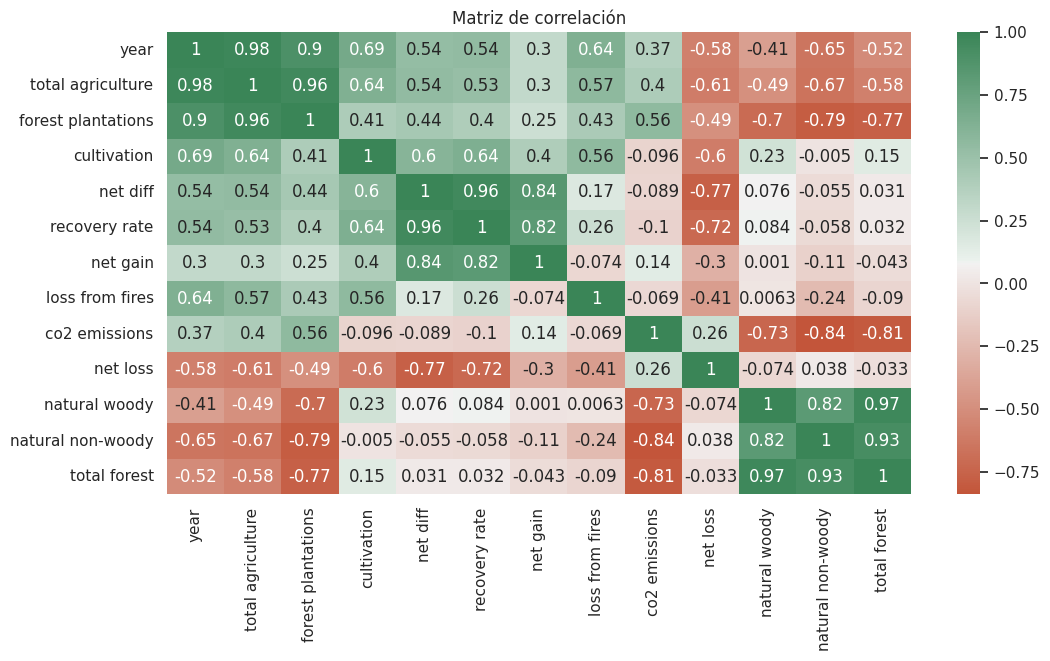

In [60]:
# df["deforestation rate"] = df["total loss"] / df["total forest"] * 100
df["net diff"] = df["total forest"].diff()
# df["aggr net diff"] = df["total agriculture"].diff()
df["recovery rate"] = df["net gain"] / df["net loss"] * 100
# df["deforestation rate"] = df["net loss"] / df["total forest"] * 100

acc_gain = df["net gain"].sum()
acc_loss = df["net loss"].sum()
acc_net_diff = df["net diff"].sum()
# print(df[["total forest", "net diff", "gain", "year"]])
print("ganancia acumulada", acc_gain)
print("perdida acumulada", acc_loss)

print("perdida neta", acc_loss - acc_gain)
print("diferencia 2020-2000", df["total forest"][0] - df["total forest"][19])
# 2. Análisis de correlación
correlation_matrix = df[
    [
        "year",
        "total agriculture",
        "forest plantations",
        "cultivation",
        "net diff",
        "recovery rate",
        "net gain",
        "loss from fires",
        "co2 emissions",
        # "co22 emissions",
        # "natural woody",
        # "deforestation rate",
        "net loss",
        "natural woody",
        "natural non-woody",
        "total forest",
    ]
].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=sns.diverging_palette(20, 140, as_cmap=True),
)
plt.title("Matriz de correlación")
plt.savefig("../data/charts/correlation_matrix.jpg", bbox_inches="tight")
plt.show()
plt.close()
df = pd.DataFrame(df)

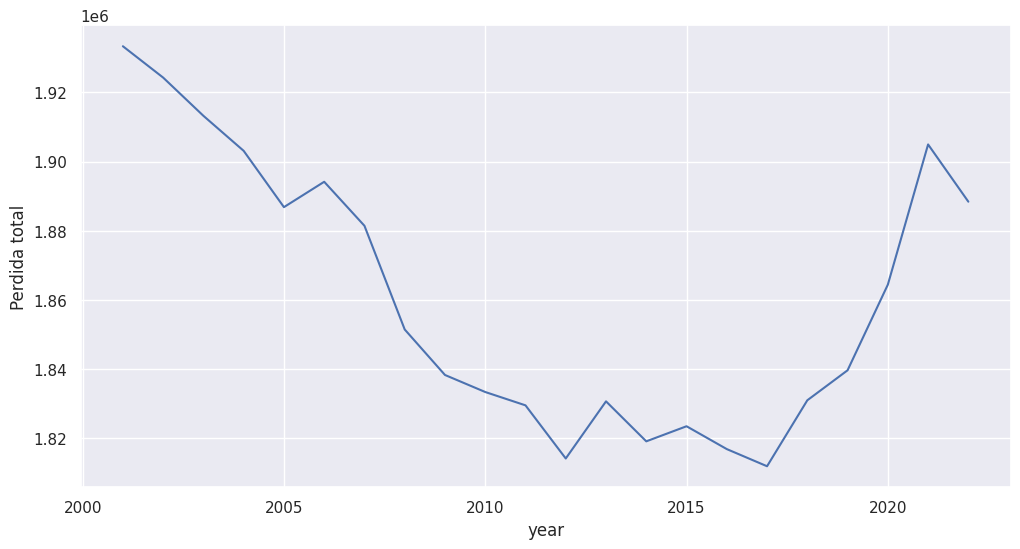

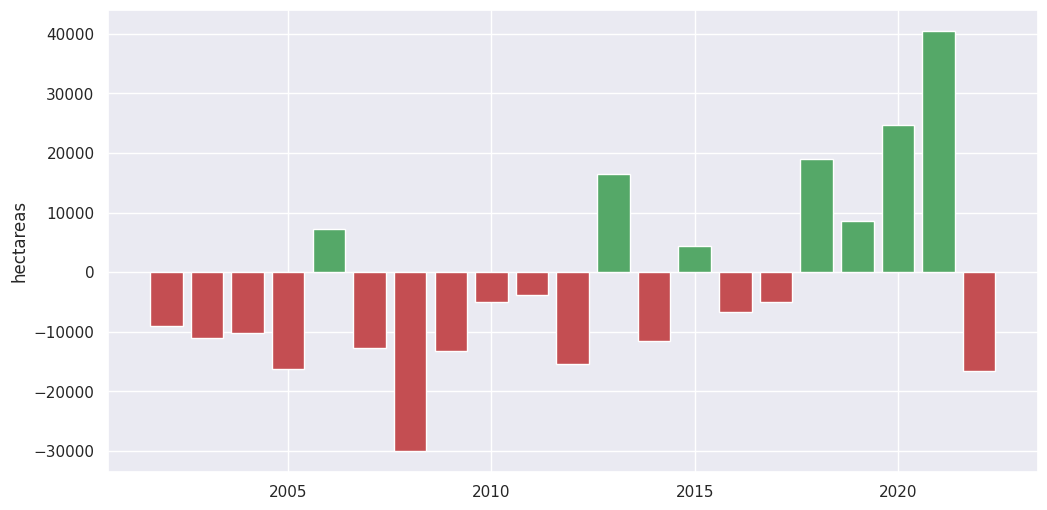

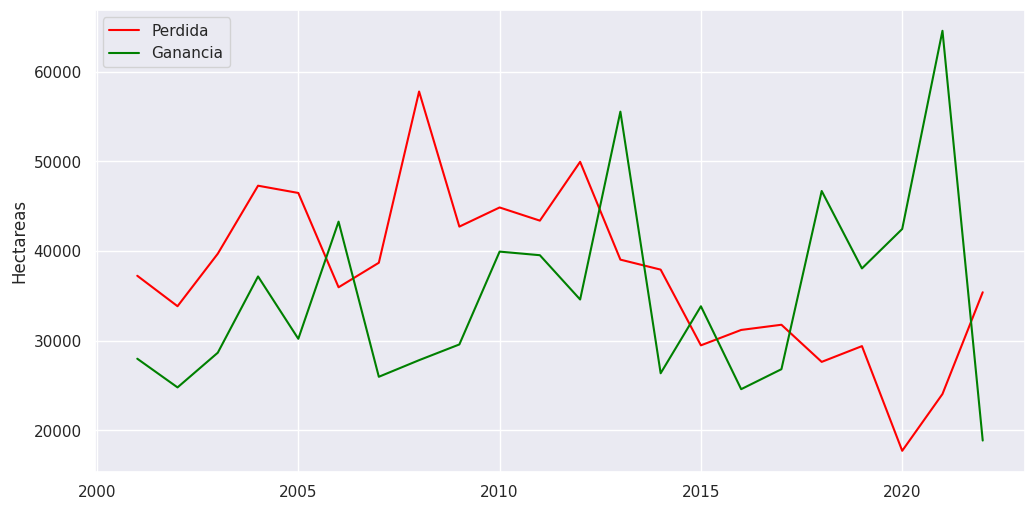

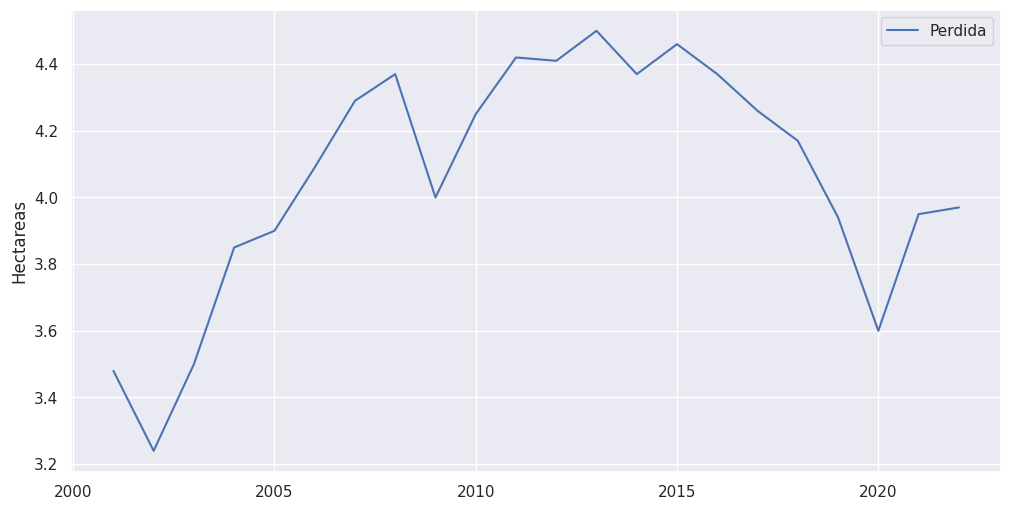

Años con cambios significativos: [2008.0, 2018.0, 2020.0, 2021.0]


In [61]:
# 1. Tendencias temporales

plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="total forest")
plt.ylabel("Perdida total")
# plt.savefig("../data/charts/linear--total_forest-year.jpg", bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
colors = ["g" if m > 0 else "r" for m in df["net diff"]]
plt.bar(df["year"], df["net diff"], bottom=0, color=colors)
# plt.hlines(
#     y=0,
#     xmin=2002,
#     xmax=2022,
#     colors="red",
#     linestyles="--",
#     lw=2,
#     label="Linea de recuperacion",
# )
plt.ylabel("hectareas")
plt.savefig("../data/charts/bar--recovery_rate.jpg", bbox_inches="tight")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["net loss"], label="Perdida", color="Red")
plt.plot(df["year"], df["net gain"], label="Ganancia", color="Green")
plt.ylabel("Hectareas")
plt.legend()
plt.savefig("../data/charts/linear--gain_loss-year.jpg", bbox_inches="tight")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["co2 emissions"], label="Perdida")
# plt.plot(df["year"], df["net loss"], label="Ganancia")
plt.ylabel("Hectareas")
plt.legend()
# plt.savefig("../data/charts/bar--loss_from_fires-year.jpg", bbox_inches="tight")
plt.show()
plt.close()

# plt.figure(figsize=(12, 6))
# plt.plot(df["year"], df["total loss"], label="loss")
# plt.plot(df["year"], df["loss from fires"], label="Loss from fires")
# plt.plot(df["year"], df["cultivation"], label="cultivation")
# plt.legend()
# plt.savefig("../data/charts/linear--gain_loss-year.jpg", bbox_inches="tight")
# plt.show()
# plt.close()

# print(df.describe())


puntos_inflexion = df[abs(df["net diff"]) > df["net diff"].std()]
print("Años con cambios significativos:", puntos_inflexion["year"].tolist())

En este punto queremos construir un modelo que nos prediga la perdida y ganancia en anios siguientes o en una porcion, para esto nos preguntamos cuales son los parametros mas importantes 

In [62]:
import numpy as np
import pandas as pd

files_with_6_features = ["BERNARDO DE IRIGOYEN AERO.txt", "OBERA.txt"]
files_with_9_features = ["IGUAZU AERO.txt", "POSADAS AERO.txt"]

file_names = [*files_with_9_features, *files_with_6_features]

result = np.zeros([9, 23, 4, 32, 13], dtype="object")

index_mapping = {
    0: 0,  # Precipitaciones (mm) -> 0
    1: 1,  # Temperatura Máxima (°C) -> 1
    2: 2,  # Temperatura Mínima (°C) -> 2
    3: 4,  # Viento Máximo (km/h) -> 4
    4: 6,  # Humedad Relativa Máxima (%) -> 6
    5: 7,  # Humedad Relativa Mínima (%) -> 7
}

for file_index, file_name in enumerate(file_names):
    # start lecture in lines of the file
    file = open(
        f"../raw_data/metereological center/{file_name}", encoding="latin-1"
    )
    content = file.readlines()[5:]

    row_index = 0
    end = len(content)

    year = 0
    parameter_index = -1

    while row_index < end:
        # Get header
        while row_index < end and not content[row_index].startswith("Dia"):
            row_index += 1
        if row_index >= end:
            break

        # Start processing dataframe
        parameter_df = []
        for day in range(32):
            parameter_df.append(content[row_index + day].split(";")[:-1])
        row_index += 32
        # Check for parameter divergence
        if year == 0:
            parameter_index += 1

        # print(parameter_index, file_index, year)
        if file_name in files_with_6_features:
            result[index_mapping[parameter_index], year, file_index] = np.array(
                parameter_df
            )
        else:
            result[parameter_index, year, file_index] = np.array(parameter_df)
        year = (year + 1) % 23
    file.close()

precipitations = result[0]
max_temperature = result[1]
min_temperature = result[2]
avg_temperature = result[3]
max_wind = result[4]
avg_scalar_wind = result[5]
max_humidity = result[6]
min_humidity = result[7]
avg_humidity = result[8]

In [63]:
import numpy as np
import pandas as pd

precipitation_totals = []
combined_precipitation_dfs = []

for year_data in precipitations:
    combined_df = pd.DataFrame()
    valid_counts = pd.DataFrame()

    for file_data in year_data:
        aux_df = pd.DataFrame(columns=file_data[0], data=file_data[1:])
        aux_df = aux_df.replace({",": ".", "<0.1": "0.05"}, regex=True)
        aux_df.replace("S/P", np.nan, inplace=True)
        aux_df = aux_df.apply(pd.to_numeric, errors="coerce")

        if valid_counts.empty:
            valid_counts = aux_df.notna().astype(int)
            combined_df = aux_df.copy()
        else:
            valid_counts += aux_df.notna().astype(int)
            combined_df = combined_df.add(aux_df, fill_value=0)

    # Calculate the average, ignoring NaN values
    combined_avg = combined_df.div(valid_counts)
    combined_avg = combined_avg.replace([np.inf, -np.inf], np.nan)
    combined_precipitation_dfs.append(combined_avg)

In [64]:
# Example usage:
combined_precipitations = []
for year_df in combined_precipitation_dfs:
    monthly_sums = year_df.iloc[:, 1:].sum(axis=0)
    yearly_sum = monthly_sums.sum()
    combined_precipitations.append(yearly_sum)
print(combined_precipitations)

[np.float64(2433.3791666666666), np.float64(2245.1499999999996), np.float64(2869.1375000000003), np.float64(2220.9416666666666), np.float64(1988.6333333333334), np.float64(2071.820833333333), np.float64(2332.7458333333334), np.float64(2620.6875), np.float64(1990.2416666666666), np.float64(2796.4249999999997), np.float64(2416.616666666667), np.float64(2155.033333333333), np.float64(2192.1124999999997), np.float64(2448.1458333333335), np.float64(3256.9416666666666), np.float64(3115.4791666666665), np.float64(2453.9791666666665), np.float64(2868.9125), np.float64(2506.7291666666665), np.float64(2261.7666666666664), np.float64(1843.0416666666665), np.float64(1800.0958333333333), np.float64(2586.808333333333)]


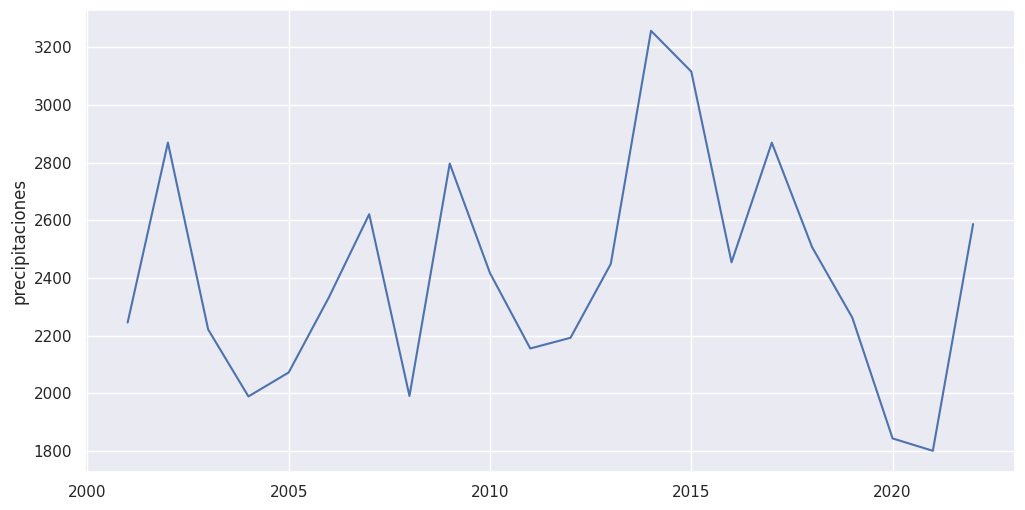

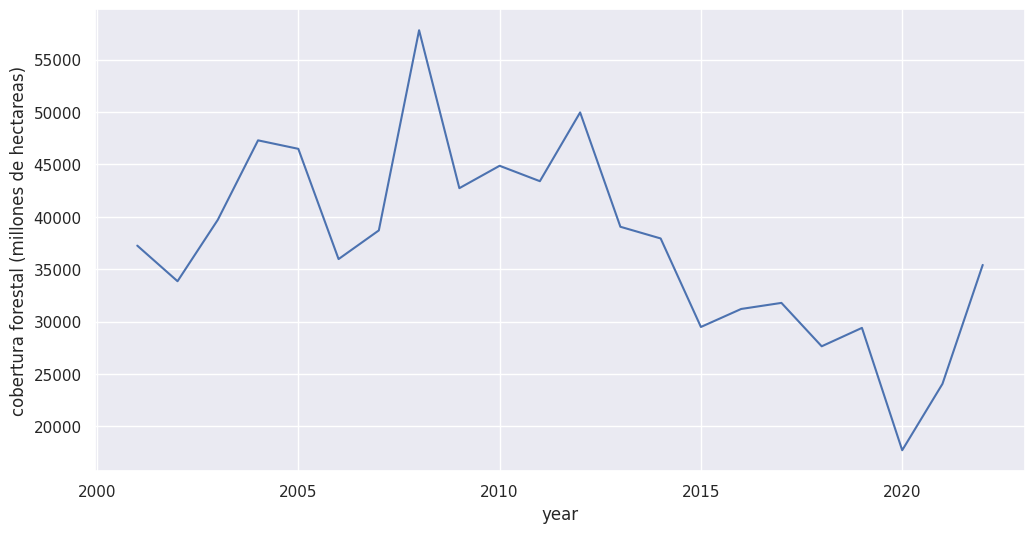

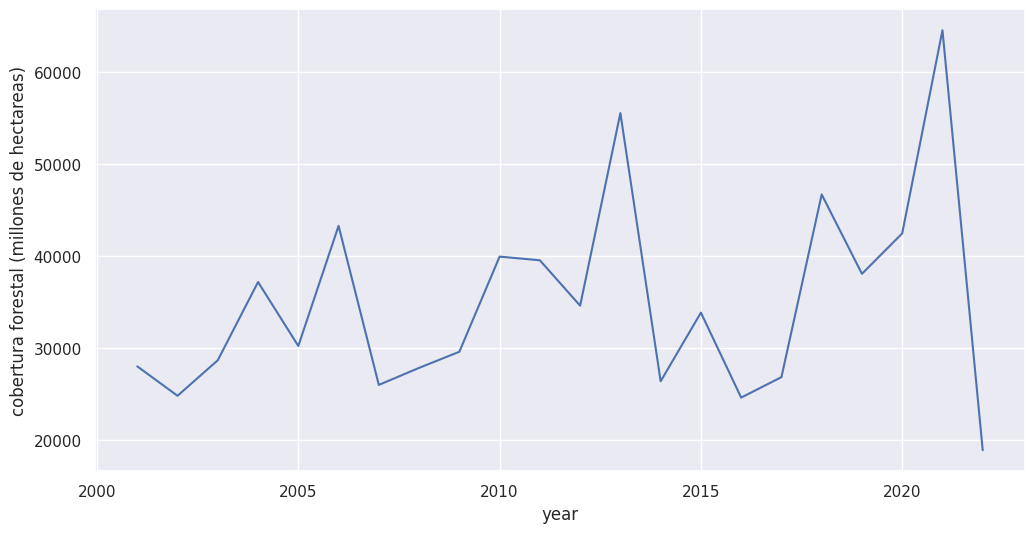

In [65]:
years = list(range(2000, 2020))
# print(correlation_r(df["gain"], combined_precipitations[1:]))
# print(correlation_r(df["loss"], combined_precipitations[1:]))

plt.figure(figsize=(12, 6))
plt.plot(df["year"], combined_precipitations[1:])
plt.ylabel("precipitaciones")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="net loss")

plt.ylabel("cobertura forestal (millones de hectareas)")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(df, x="year", y="net gain")
plt.ylabel("cobertura forestal (millones de hectareas)")
plt.show()

In [66]:
import numpy as np
import pandas as pd


def process_meteorological_data(data, dl, replace_dict=None, to_numeric=True):
    """Process meteorological data for multiple years and files.

    :param data: numpy array with shape [years, files, rows, columns]
    :param dl: logical dimention of the file array
    :param replace_dict: dictionary of values to replace (e.g., {"S/P": np.nan,
         "<0.1": "0.05"})
    :param to_numeric: boolean, whether to convert data to numeric
    :return: list of processed DataFrames, one for each year
    """
    processed_dfs = []

    for year_data in data:
        combined_df = pd.DataFrame()
        valid_counts = pd.DataFrame()

        for i in range(0, dl):
            file_data = year_data[i]
            aux_df = pd.DataFrame(columns=file_data[0], data=file_data[1:])

            if replace_dict:
                aux_df = aux_df.replace(replace_dict)

            aux_df = aux_df.replace({",": "."}, regex=True)

            if to_numeric:
                aux_df = aux_df.apply(pd.to_numeric, errors="coerce")

            if valid_counts.empty:
                valid_counts = aux_df.notna().astype(int)
                combined_df = aux_df.copy()
            else:
                valid_counts += aux_df.notna().astype(int)
                combined_df = combined_df.add(aux_df, fill_value=0)

        # Calculate the average, ignoring NaN values
        combined_avg = combined_df.div(valid_counts)
        combined_avg = combined_avg.replace([np.inf, -np.inf], np.nan)
        processed_dfs.append(combined_avg)

    return processed_dfs

In [67]:
def process_years(processed_dfs):
    yearly_sums = []
    for year_df in processed_dfs:
        monthly_sums = year_df.iloc[:, 1:].sum(axis=0)
        yearly_sum = monthly_sums.sum()
        yearly_sums.append(yearly_sum)
    return yearly_sums

In [68]:
# [['Dia' 'Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sep' 'Oct' 'Nov'
#   'Dic']
#  ['1' 'S/P' 'S/P' 'S/P' 'S/P' '13,0' '35,0' 'S/P' 'S/P' '14,0' 'S/P'
#   'S/P' 'S/P']
#  ['2' '23,0' 'S/P' '3,0' 'S/P' '26,0' '0,1' 'S/P' 'S/P' '0,8' 'S/P' 'S/P'
#   '5,0']

In [69]:
replace_dict = {"S/P": np.nan, "<0.1": "0.05"}
precipitations_processed = process_meteorological_data(
    precipitations, dl=4, replace_dict=replace_dict
)
yearly_precipitations = process_years(precipitations_processed)

replace_dict = {"s/d": np.nan}
max_temperature_processed = process_meteorological_data(max_temperature, dl=4)
yearly_max_temperature = process_years(max_temperature_processed)

min_temperature_processed = process_meteorological_data(min_temperature, dl=4)
yearly_min_temperature = process_years(min_temperature_processed)

max_humidity_processed = process_meteorological_data(max_humidity, dl=4)
yearly_max_humidity = process_years(max_humidity_processed)

min_humidity_processed = process_meteorological_data(min_humidity, dl=4)
yearly_min_humidity = process_years(min_humidity_processed)

avg_temperature_processed = process_meteorological_data(avg_temperature, dl=2)
yearly_avg_temperature = process_years(avg_temperature_processed)

avg_scalar_wind_processed = process_meteorological_data(avg_scalar_wind, dl=2)
yearly_avg_scalar_wind = process_years(avg_scalar_wind_processed)

avg_humidity_processed = process_meteorological_data(avg_humidity, dl=2)
yearly_avg_humidity = process_years(avg_humidity_processed)


In [70]:
features = pd.DataFrame(
    data={
        "max humidity": yearly_max_humidity,
        "min humidity": yearly_min_humidity,
        "avg humidity": yearly_avg_humidity,
        "precipitations": yearly_precipitations,
        "avg scalar wind": yearly_avg_scalar_wind,
        "min temperature": yearly_min_temperature,
        "max temperature": yearly_max_temperature,
        "avg temperature": yearly_avg_temperature,
    }
)
# feature = pd.DataFrame(data=features)
features = features[1:].reset_index(drop=True)  # Eliminamos el año 2000
# print(df[["year", "total gain"]])

features = pd.concat(
    [
        features,
        df[
            [
                "loss from fires",
                "total agriculture",
                # "gain",
                # "loss",
                "year",
                "net diff",
                "net gain",
                "net loss",
                # "natural woody",
                "total forest",
            ]
        ],
    ],
    axis=1,
)

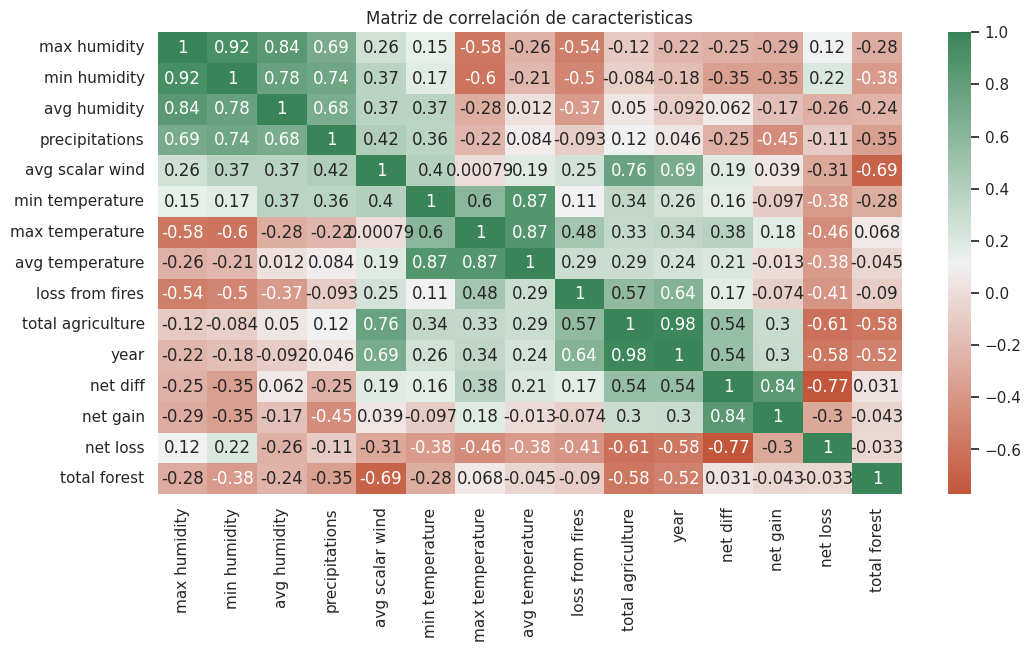

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear matriz de correlación
corr_matrix = features.corr()


plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix, annot=True, cmap=sns.diverging_palette(20, 140, as_cmap=True)
)
plt.title("Matriz de correlación de caracteristicas")
plt.savefig("../data/charts/corr-prediction.jpg", bbox_inches="tight")
plt.show()

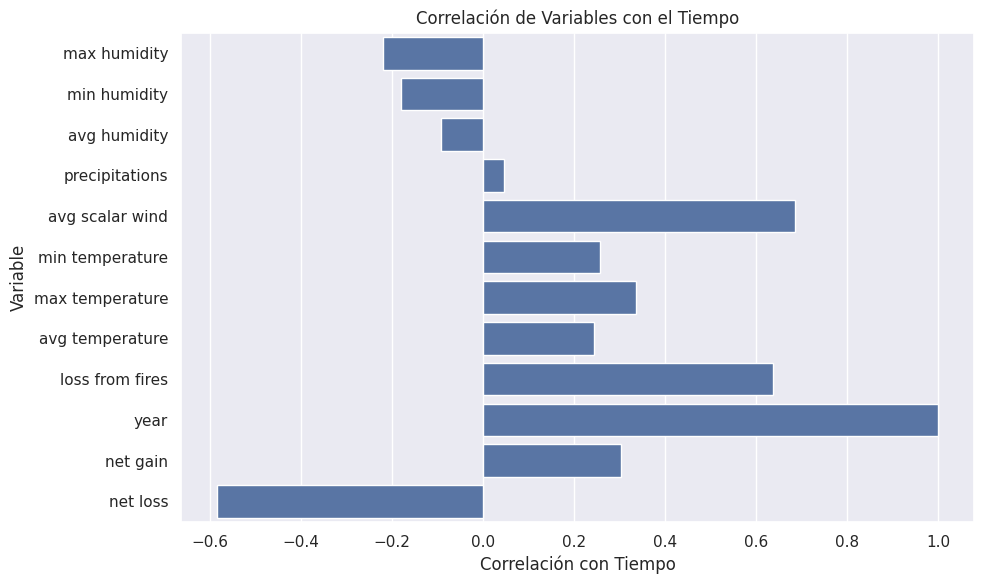

In [72]:
# Crear un dataframe de correlaciones temporales
rows = []
for column in features.select_dtypes(include=[np.number]).columns:
    correlation = features["year"].corr(features[column])
    rows.append([column, correlation])

time_correlations = pd.DataFrame(
    rows, columns=["Variable", "Correlación con Tiempo"]
)


# Visualizar correlaciones temporales
plt.figure(figsize=(10, 6))
sns.barplot(x="Correlación con Tiempo", y="Variable", data=time_correlations)
plt.title("Correlación de Variables con el Tiempo")
plt.tight_layout()

/tmp/ipykernel_16223/476980778.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f"{column}_change_rate"] = features[column].pct_change() * 100
/tmp/ipykernel_16223/476980778.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f"{column}_change_rate"] = features[column].pct_change() * 100


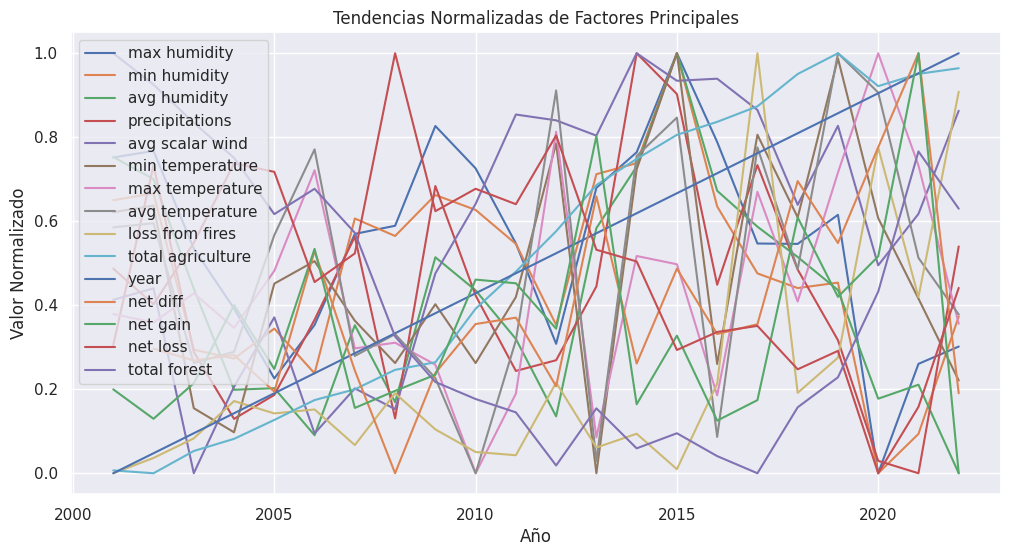

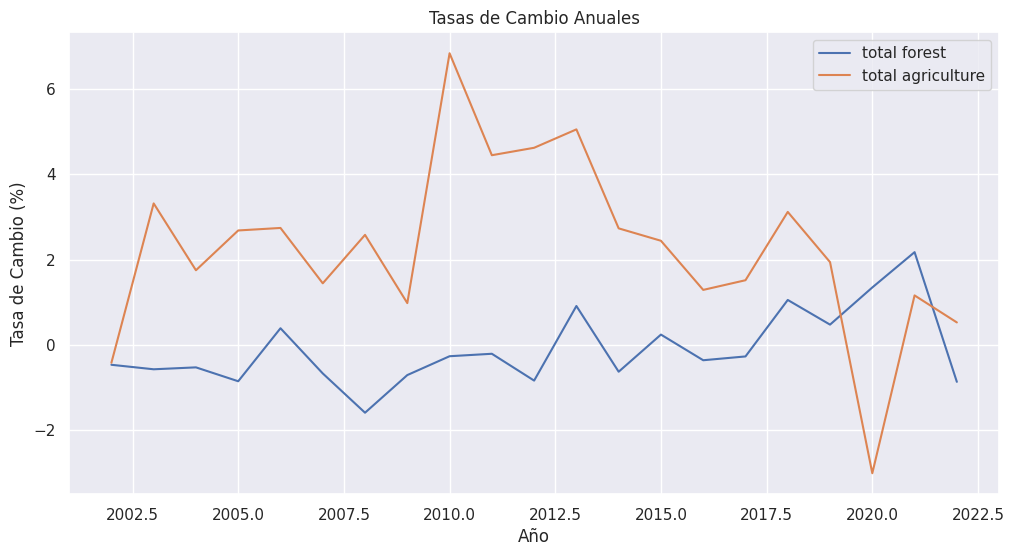

<Figure size 1200x600 with 0 Axes>

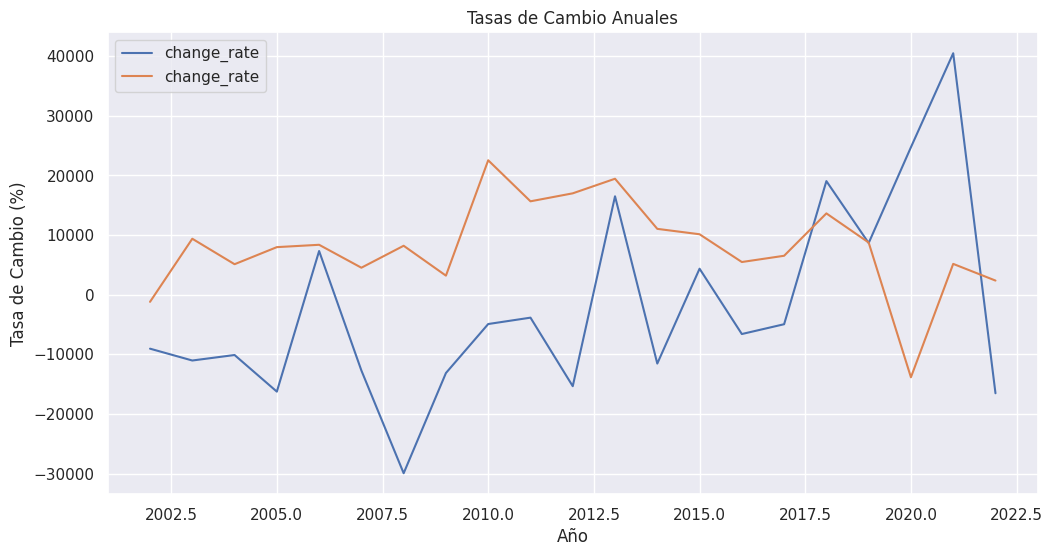

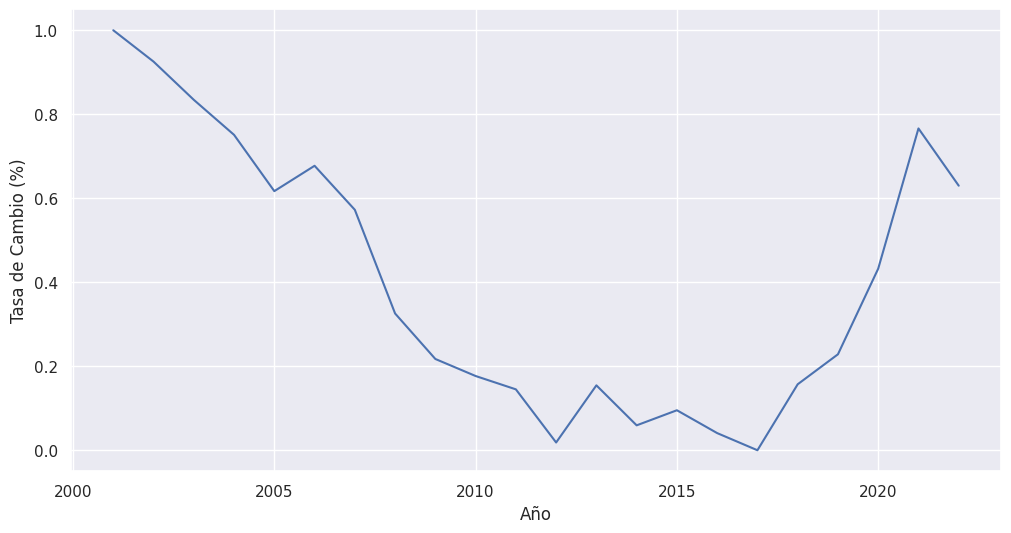

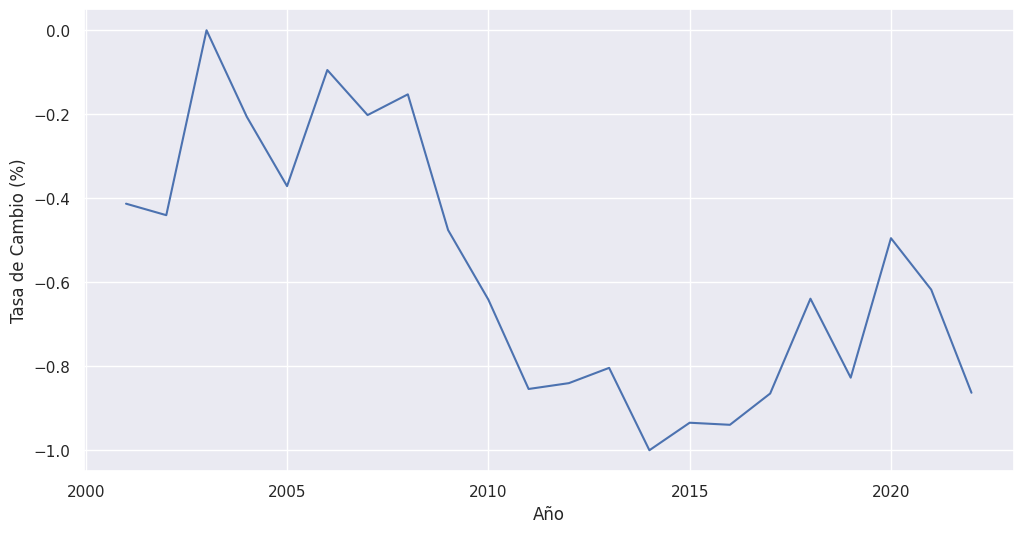

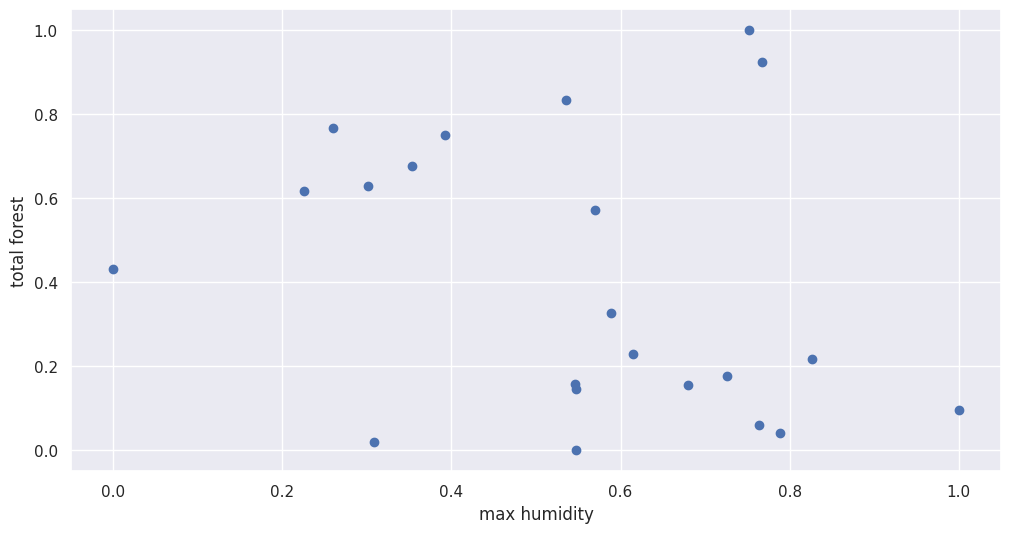

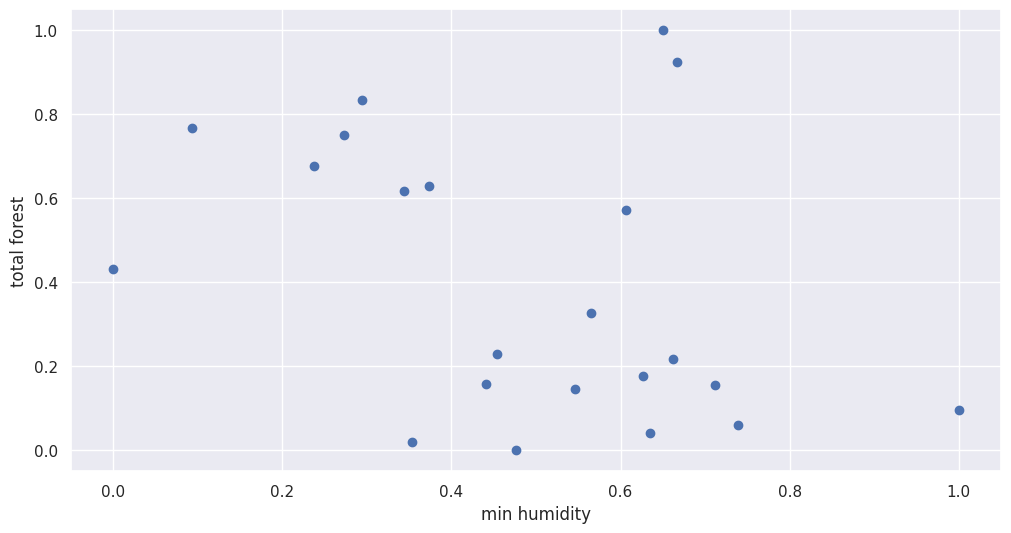

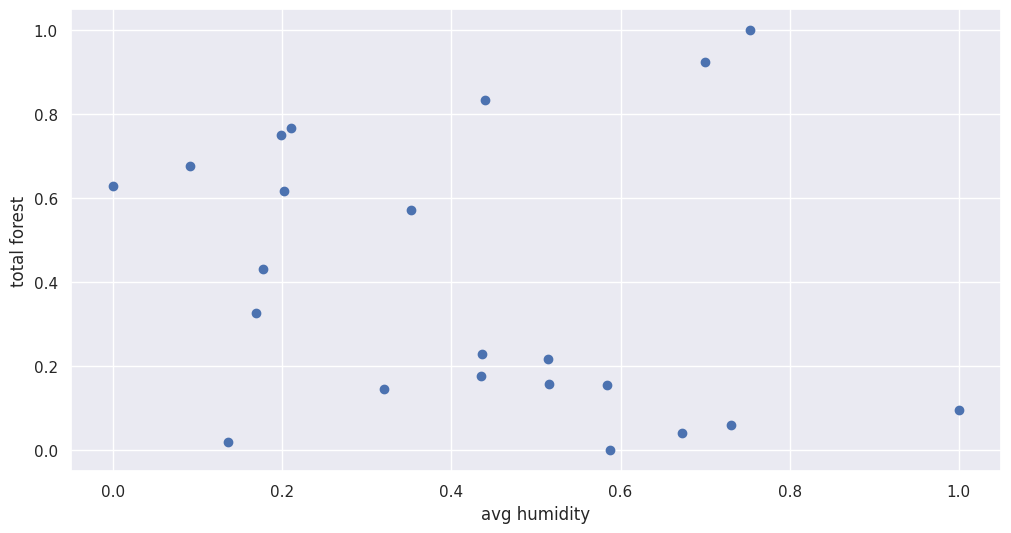

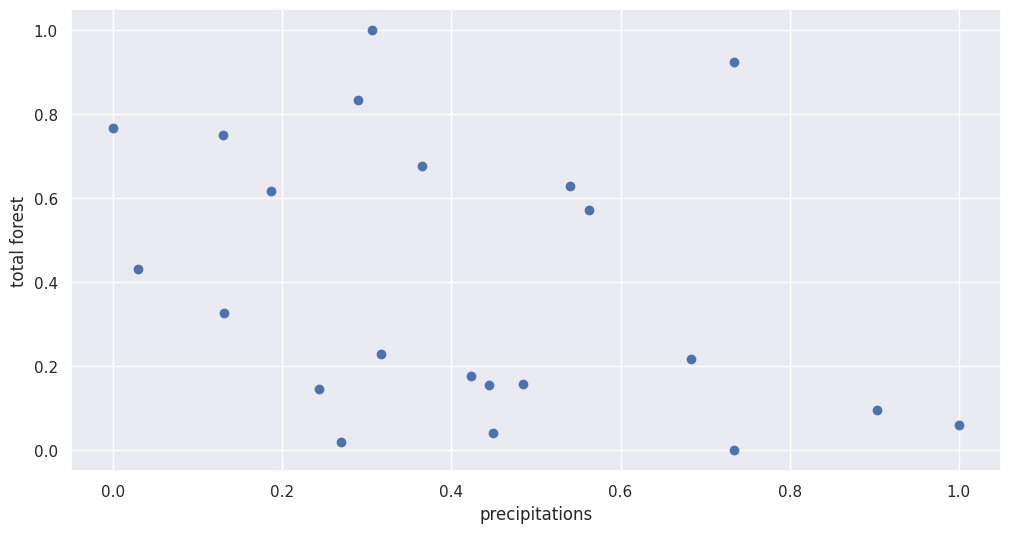

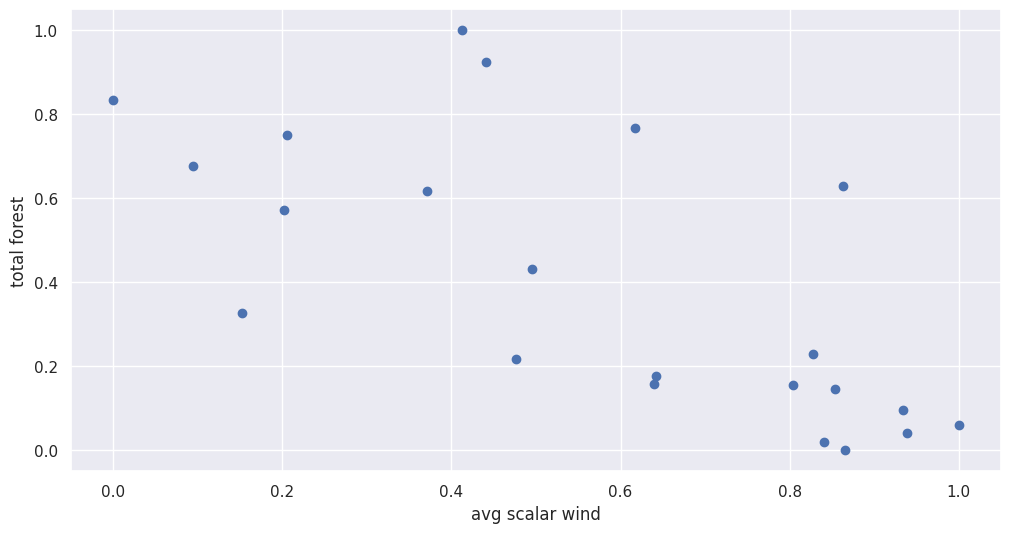

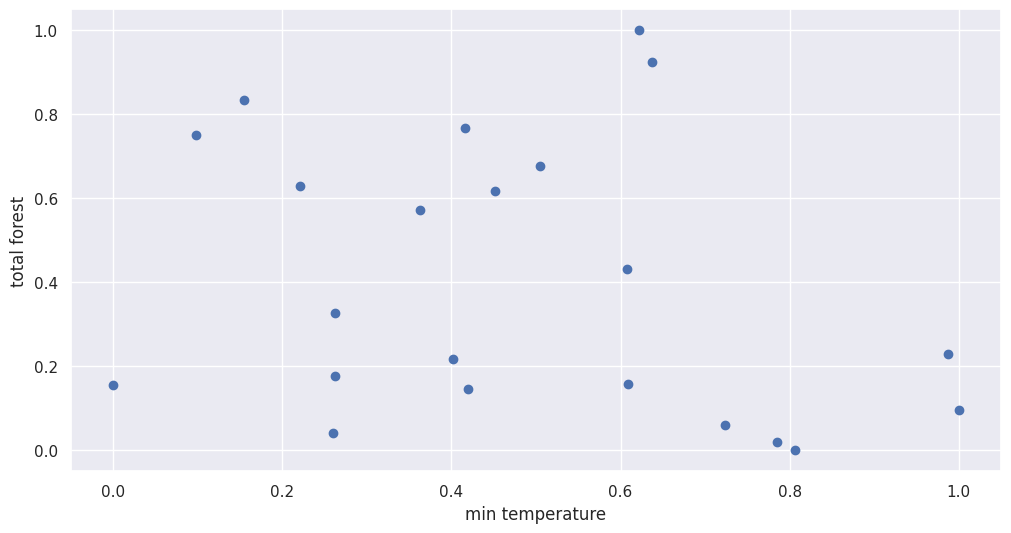

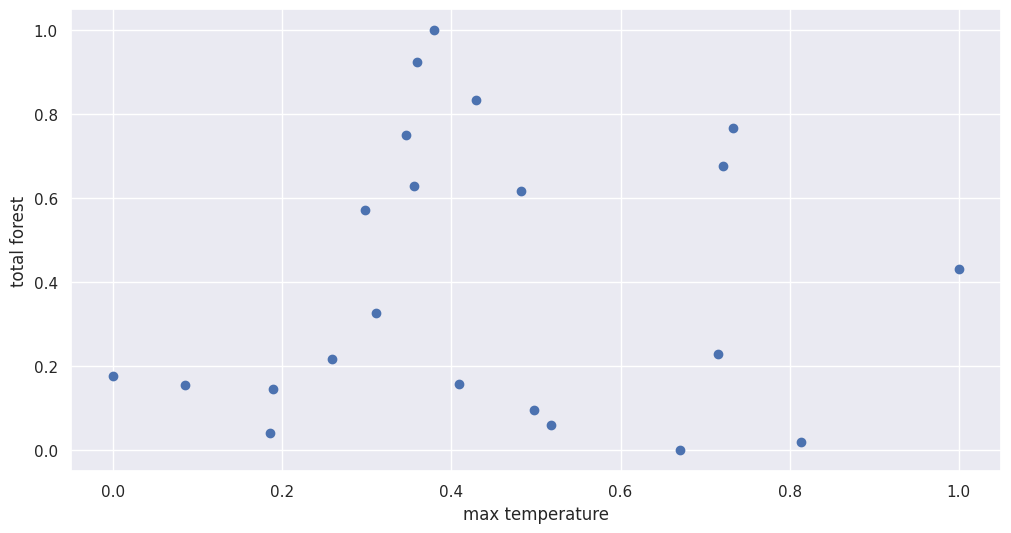

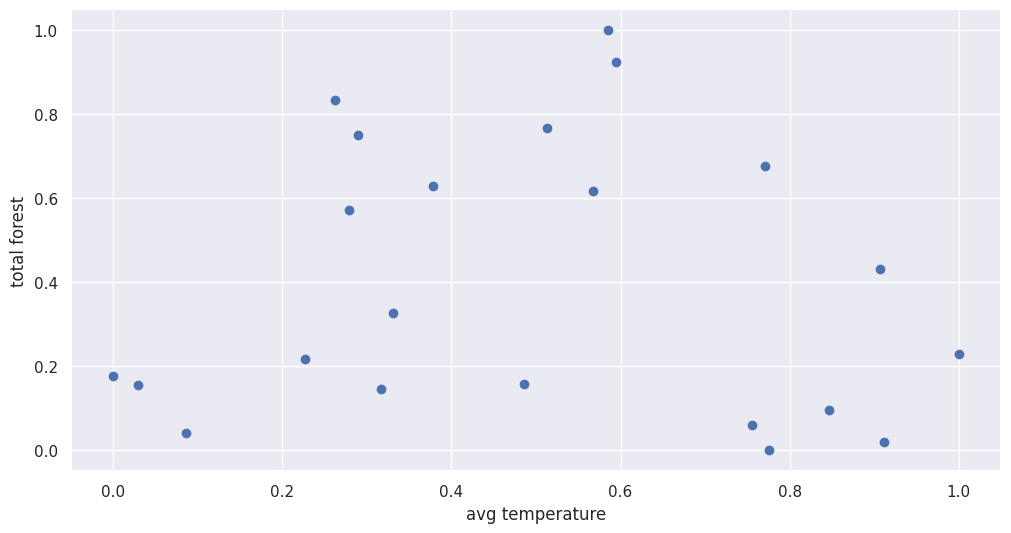

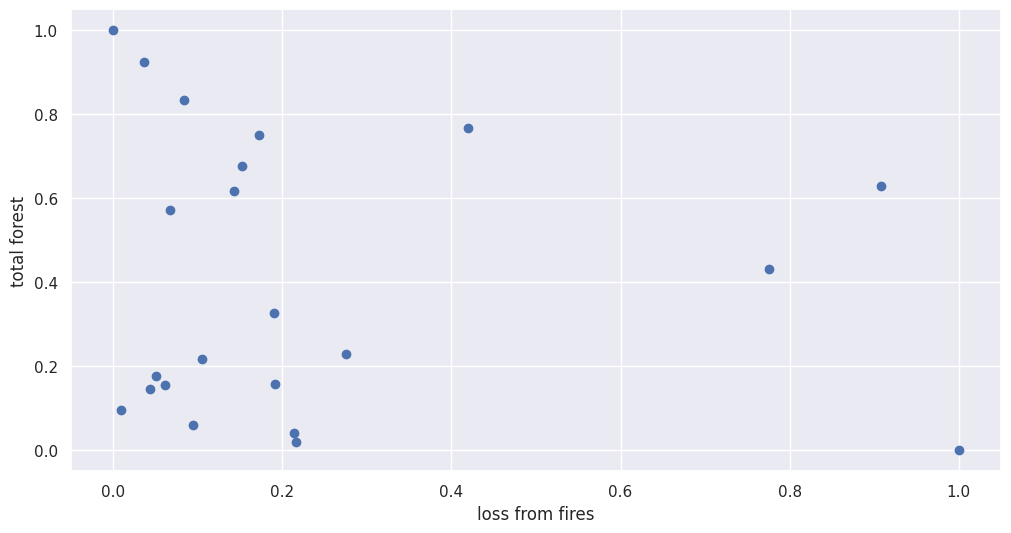

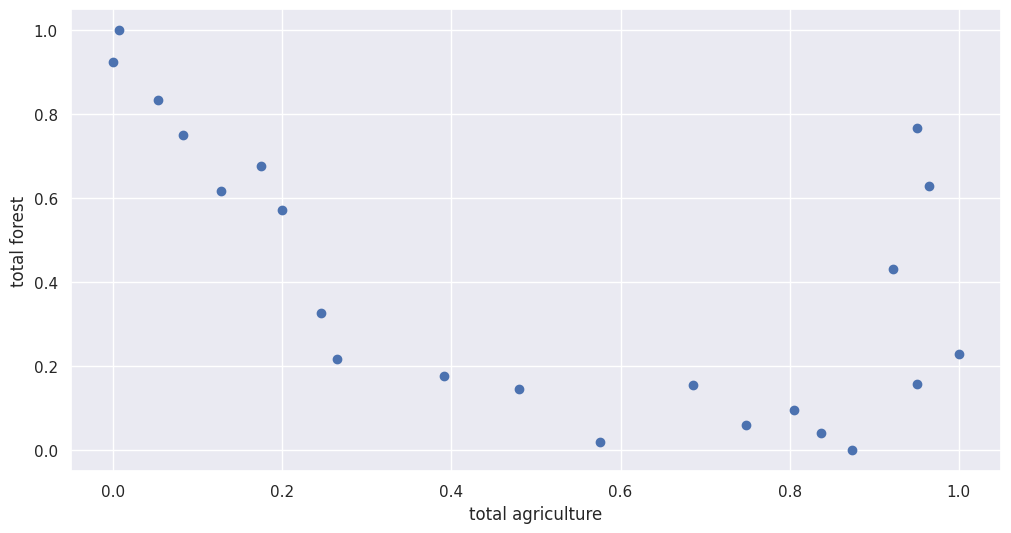

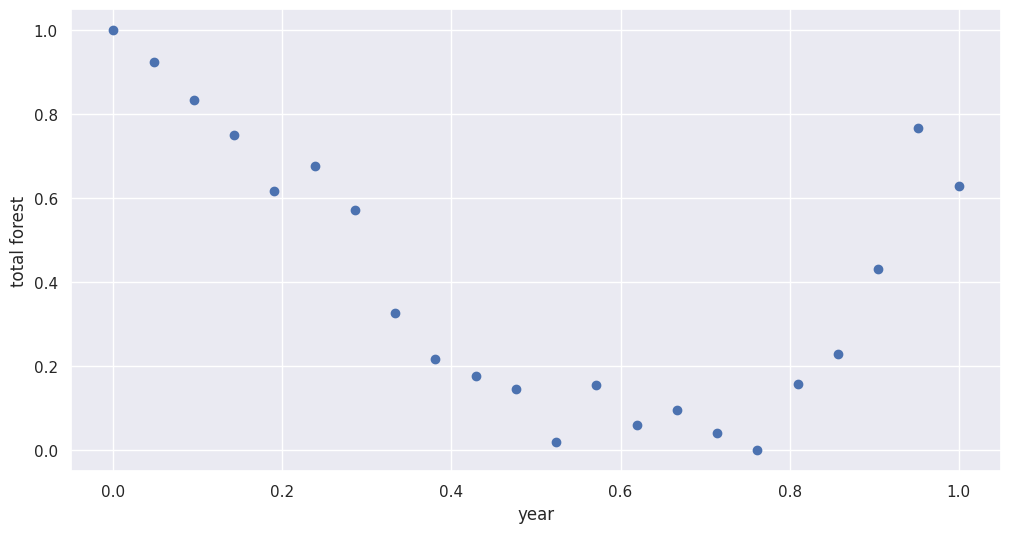

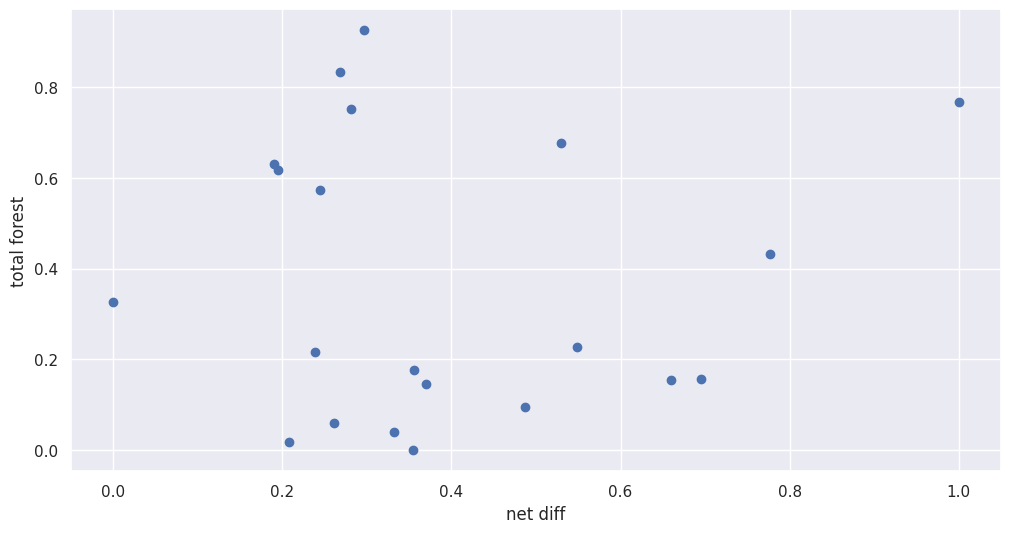

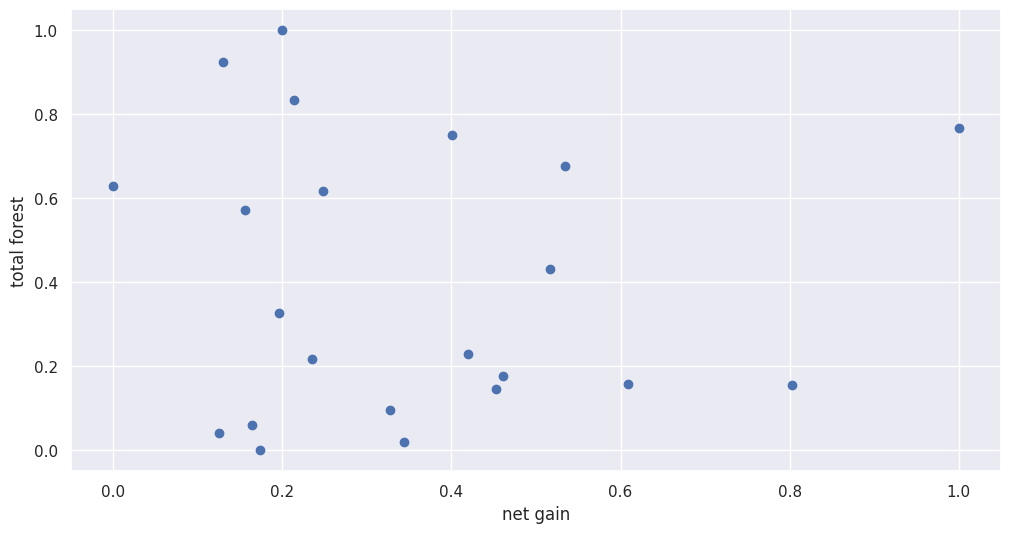

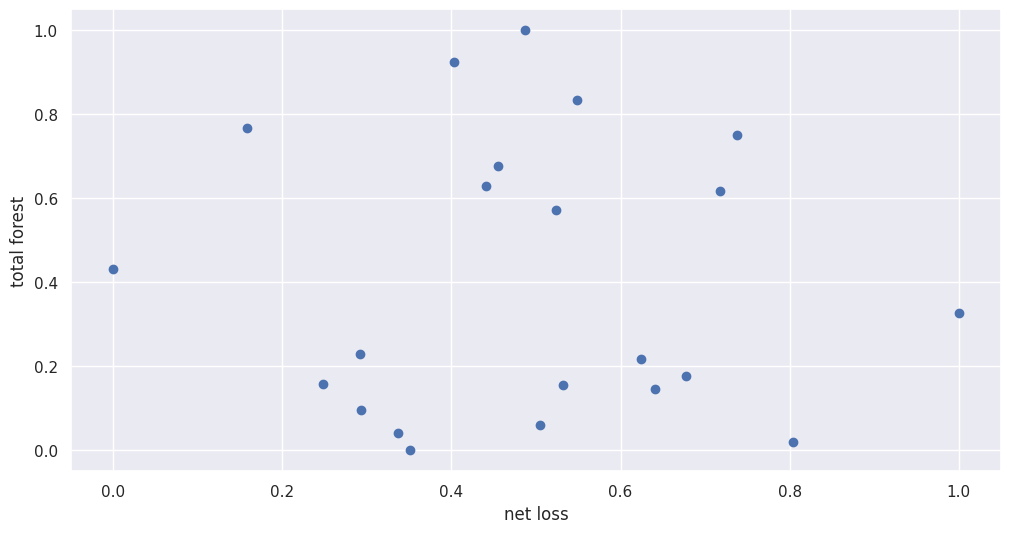

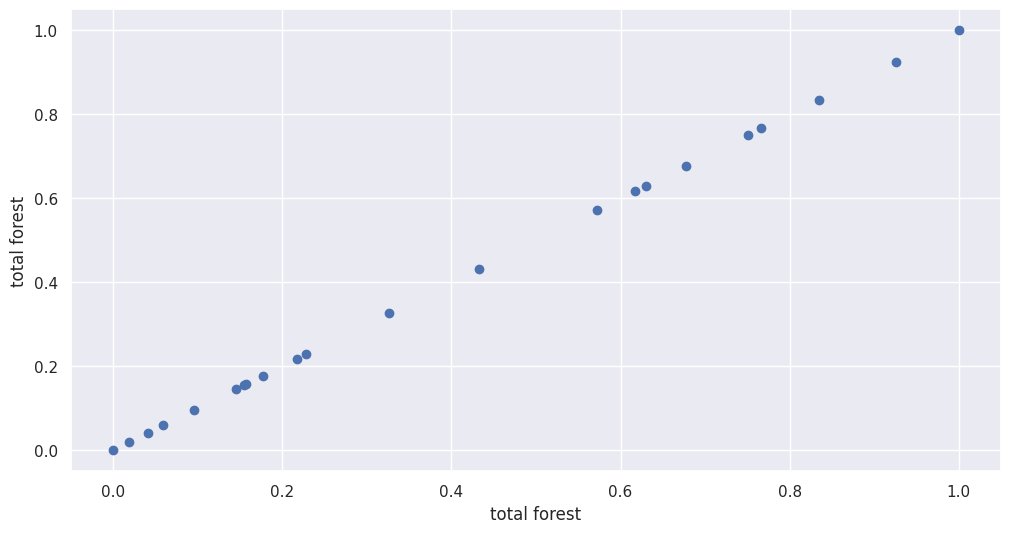

In [73]:
# Normalizar variables para comparar tendencias

normalized_df = features.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Crear gráfico de líneas múltiples
plt.figure(figsize=(12, 6))
for column in normalized_df.columns:
    plt.plot(features["year"], normalized_df[column], label=column)
plt.legend()
plt.title("Tendencias Normalizadas de Factores Principales")
plt.xlabel("Año")
plt.ylabel("Valor Normalizado")

df = pd.DataFrame()
for column in ["total forest", "total agriculture"]:
    df[f"{column}_change_rate"] = features[column].pct_change() * 100

# Visualizar tasas de cambio
plt.figure(figsize=(12, 6))
for column in ["total forest_change_rate", "total agriculture_change_rate"]:
    plt.plot(
        features["year"][1:],
        df[column][1:],
        label=column.replace("_change_rate", ""),
    )
plt.legend()
plt.title("Tasas de Cambio Anuales")
plt.xlabel("Año")
plt.ylabel("Tasa de Cambio (%)")
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
plt.plot(features["year"], features["net diff"], label=("change_rate"))
plt.plot(
    features["year"],
    features["total agriculture"].diff(),
    label=("change_rate"),
)
plt.legend()
plt.title("Tasas de Cambio Anuales")
plt.xlabel("Año")
plt.ylabel("Tasa de Cambio (%)")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(features["year"], normalized_df["total forest"])
plt.xlabel("Año")
plt.ylabel("Tasa de Cambio (%)")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(features["year"], -normalized_df["avg scalar wind"])
plt.xlabel("Año")
plt.ylabel("Tasa de Cambio (%)")
plt.show()


for column in normalized_df:
    plt.figure(figsize=(12, 6))
    plt.scatter(
        normalized_df[column], normalized_df["total forest"], label=column
    )
    plt.xlabel(column)
    plt.ylabel("total forest")
    plt.show()

Text(0.5, 1.0, 'Análisis de Componentes Principales - Varianza Explicada')

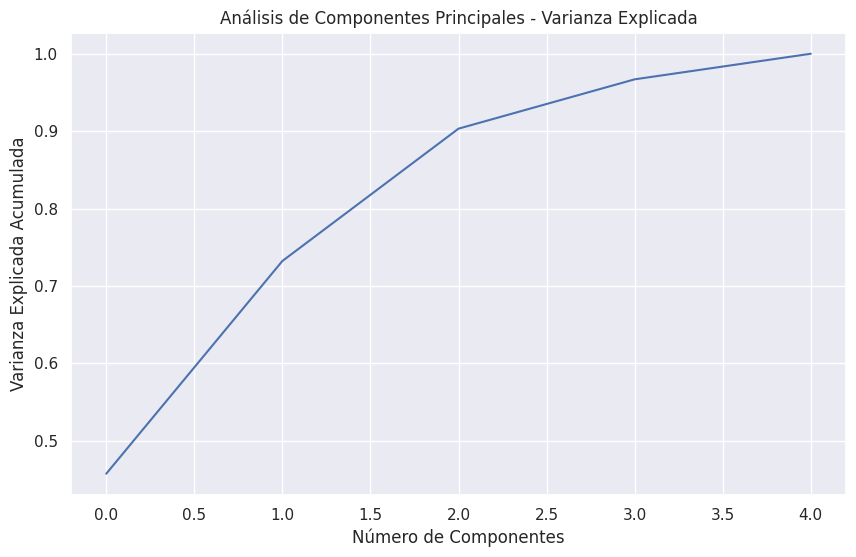

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preparar datos para PCA
features_for_pca = [
    "precipitations",
    "avg humidity",
    "avg scalar wind",
    "avg temperature",
    "total agriculture",
]
X = features[features_for_pca]
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Visualizar varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Análisis de Componentes Principales - Varianza Explicada")

Probamos unicamente con la zona de iguazu

In [75]:
iguazu_loss = pd.read_csv(
    "../raw_data/gfw/iguazu_treecover_loss__ha.csv", sep=","
)
iguazu_loss.rename(
    columns={
        "umd_tree_cover_loss__year": "year",
        "umd_tree_cover_loss__ha": "loss",
        "gfw_gross_emissions_co2e_all_gases__Mg": "co2_emissions",
    },
    inplace=True,
)
iguazu_loss = iguazu_loss[["year", "loss", "co2_emissions"]]

# ///////////////////////////////

iguazu_data = np.zeros([9, 23, 32, 13], dtype="object")
with open(
    "../raw_data/metereological center/IGUAZU AERO.txt", encoding="latin-1"
) as iguazu_file:
    content = iguazu_file.readlines()[5:]

    row_index = 0
    end = len(content)

    year = 0
    parameter_index = -1

    while row_index < end:
        # Get header
        while row_index < end and not content[row_index].startswith("Dia"):
            row_index += 1
        if row_index >= end:
            break
        # Start processing dataframe
        parameter_df = []
        for day in range(32):
            parameter_df.append(content[row_index + day].split(";")[:-1])
        row_index += 32
        # Check for parameter divergence
        if year == 0:
            parameter_index += 1
        iguazu_data[parameter_index, year] = np.array(parameter_df)
        year = (year + 1) % 23


In [76]:
import numpy as np
import pandas as pd

iguazu_precipitations = iguazu_data[0]
iguazu_precipitations_processed = []
for year_data in iguazu_precipitations:
    res = pd.DataFrame(columns=year_data[0], data=year_data[1:])
    res = res.replace({"S/P": np.nan, "<0.1": "0.05"})
    res = res.replace({",": "."}, regex=True)
    res = res.apply(pd.to_numeric, errors="coerce")
    iguazu_precipitations_processed.append(res)

iguazu_yearly_precipitations = process_years(iguazu_precipitations_processed)
print(iguazu_yearly_precipitations[0])
# print(correlation_r(iguazu_yearly_precipitations[1:], iguazu_loss["loss"][:-1]))
print(
    sum(
        [
            206.0,
            120.0,
            56.0,
            166.0,
            199.5,
            208.8,
            82.2,
            103.0,
            170.5,
            250.5,
            110.0,
            233.0,
        ]
    )
)
print(correlation_r(iguazu_yearly_precipitations[1:], iguazu_loss["loss"][:-1]))

1905.85
1905.5
-0.047009715387366514


In [88]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler


def prepare_regression_data(df):
    # Seleccionar las características y la variable objetivo
    X = df[
        [
            "avg scalar wind",
            "min humidity",
            "min temperature",
            "year",
            "total agriculture",
        ]
    ]
    y = df["total forest"]

    return X, y


def train_and_evaluate_regression_model_with_cv(X, y):
    # Normalizar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Modelo de regresión lineal
    model = LinearRegression(copy_X=True)

    # Realizar validación cruzada
    y_pred = cross_val_predict(
        model, X_scaled, y, cv=5
    )  # 5 particiones por defecto

    # Evaluar el modelo
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Obtener los coeficientes del modelo
    feature_importance = pd.DataFrame(
        {"feature": X.columns, "coefficient": model.coef_}
    )

    return model, mse, r2, feature_importance, y_pred


# Uso del código
# Asumiendo que 'features' es tu DataFrame con los datos

X, y = prepare_regression_data(features)
model, mse, r2, feature_importance, y_pred = (
    train_and_evaluate_regression_model_with_cv(X, y)
)

# Imprimir resultados
print(f"Error cuadrático medio: {mse}")
print(f"R2 Score: {r2}")
print("\nImportancia de las características (coeficientes):")
print(feature_importance)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que tenemos un DataFrame 'df' con las columnas necesarias

# Crear la variable objetivo binaria
features["target"] = (features["net diff"].shift(-1) > 0).astype(int)
features = (
    features.dropna()
)  # Eliminar la última fila que tendrá NaN en forest_change

# Seleccionar características
X = features[
    [
        "avg scalar wind",
        "min humidity",
        "avg temperature",
        "year",
        "total agriculture",
    ]
]
y = features["target"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calcular importancia de características
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": model.feature_importances_}
)
feature_importance = feature_importance.sort_values(
    "importance", ascending=False
)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(class_report)
print("\nFeature Importance:")
print(feature_importance)

# Guardar importancia de características para visualización
feature_importance_dict = dict(
    zip(feature_importance["feature"], feature_importance["importance"])
)

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Feature Importance:
             feature  importance
2    avg temperature    0.350991
1       min humidity    0.230220
0    avg scalar wind    0.155568
4  total agriculture    0.141939
3               year    0.121282


Accuracy: 0.75

Clasification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

    accuracy                           0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20



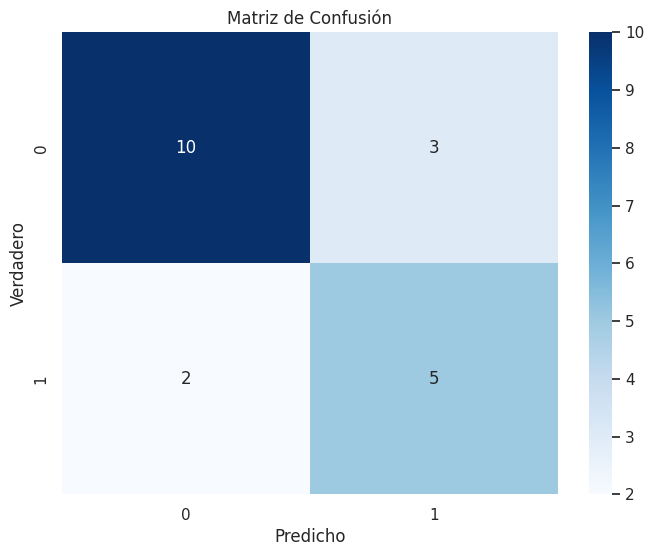

In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt


def prepare_classification_data(df):
    # Crear variable objetivo binaria
    df["forest_change"] = df["total forest"].diff().shift(-1)
    df["target"] = (df["forest_change"] > 0).astype(int)

    # Eliminar el último año ya que no tenemos el cambio para él
    df = df.dropna(subset=["forest_change"])

    # Seleccionar características
    X = df[
        [
            "avg scalar wind",
            "min humidity",
            "avg temperature",
            "year",
            "total agriculture",
        ]
    ]
    y = df["target"]

    return X, y


def train_and_evaluate_classification_model_with_cv(X, y):
    # Normalizar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Modelo de regresión logística
    model = LogisticRegression(random_state=42)

    # Realizar validación cruzada
    y_pred = cross_val_predict(
        model, X_scaled, y, cv=5
    )  # 5 particiones por defecto
    accuracy = accuracy_score(y, y_pred)

    # Calcular métricas de rendimiento
    class_report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    return model, accuracy, class_report, conf_matrix, y_pred


def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusión")
    plt.ylabel("Verdadero")
    plt.xlabel("Predicho")
    return plt


# Uso del código
# Asumiendo que 'features' es tu DataFrame con los datos

X, y = prepare_classification_data(features)
model, accuracy, class_report, conf_matrix, y_pred = (
    train_and_evaluate_classification_model_with_cv(X, y)
)

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print("\nClasification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix)
plt.show()
